#Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,auc,roc_curve  
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#Read_Data

In [2]:
df=pd.read_csv('breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#check null

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

#Encoding

In [5]:
df['diagnosis'] = [1 if each == "M" else 0 for each in df.diagnosis]
df['diagnosis'].unique()

array([1, 0], dtype=int64)

#split_data(train,valid,test)

In [6]:
x = df.drop(['id','diagnosis','Unnamed: 32'], axis = 1)
y = df['diagnosis']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

#Scaling data

In [8]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

#Apply all Classification models

##Logistic

In [9]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred=logreg.predict(x_test)

<Axes: >

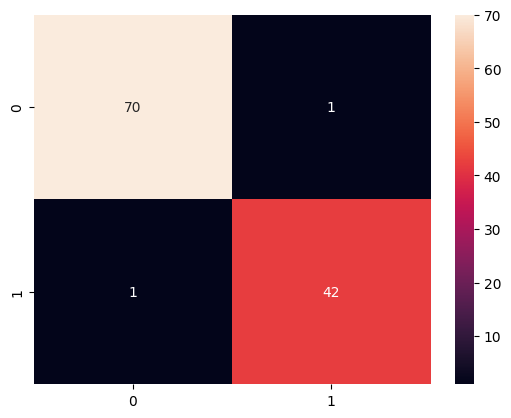

In [10]:
cm_display=confusion_matrix(y_test, y_pred)
sns.heatmap(cm_display, annot=True)

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [12]:
accracy = accuracy_score(y_test, y_pred)
f1_sc = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall_logreg = recall_score(y_test, y_pred)

print (f'logictic regression model Accuracy: {100*accracy}')
print (f'logictic regression model f1_score: {100*f1_sc}')
print (f'logictic regression model precision: {100*precision}')
print (f'logictic regression model recall: {100*recall_logreg}')

logictic regression model Accuracy: 98.24561403508771
logictic regression model f1_score: 97.67441860465115
logictic regression model precision: 97.67441860465115
logictic regression model recall: 97.67441860465115


##knn

In [13]:
param_grid = {'n_neighbors': [3,5,7,9,11,13,15,17,19]}
knn=KNeighborsClassifier()
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1)
grid_search.fit(x_train,y_train)

print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'n_neighbors': 3}
Best score:  0.917094017094017


In [14]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [15]:
y_pred=knn.predict(x_test)

In [16]:
accracy = accuracy_score(y_test, y_pred)
f1_sc = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall_knn = recall_score(y_test, y_pred)

print (f'KNN model Accuracy: {100*accracy}')
print (f'KNN model f1_score: {100*f1_sc}')
print (f'KNN model precision: {100*precision}')
print (f'KNN model recall: {100*recall_knn}')

KNN model Accuracy: 94.73684210526315
KNN model f1_score: 93.02325581395348
KNN model precision: 93.02325581395348
KNN model recall: 93.02325581395348


##svm

In [17]:
param_grid = {  'C': [0.1, 1, 10],
                'kernel': ['linear', 'poly', 'rbf'], 
                'gamma': ['auto', 'scale']}

svc=SVC()

grid_search = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1)
grid_search.fit(x_train,y_train)

print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}
Best score:  0.9703703703703704


In [18]:

svm_model=SVC(C=1,gamma='auto',kernel='linear')
svm_model.fit(x_train,y_train)

SVC(C=1, gamma='auto', kernel='linear')

In [19]:
y_pred=svm_model.predict(x_test)

In [20]:
accracy = accuracy_score(y_test, y_pred)
f1_sc = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall_svm = recall_score(y_test, y_pred)

print (f'SVM model Accuracy: {100*accracy}')
print (f'SVM model f1_score: {100*f1_sc}')
print (f'SVM model precision: {100*precision}')
print (f'SVM model recall: {100*recall_svm}')

SVM model Accuracy: 96.49122807017544
SVM model f1_score: 95.45454545454545
SVM model precision: 93.33333333333333
SVM model recall: 97.67441860465115


##decesion_tree

In [21]:
param_grid = {
  'criterion': ['entropy','gini'],
  'max_depth': [3,4,5,6,7,8,9,10],
}
model_DT = DecisionTreeClassifier()

In [22]:
grid_search = GridSearchCV(
    estimator=model_DT,
    param_grid=param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1)
grid_search.fit(x_train,y_train)

print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'criterion': 'gini', 'max_depth': 10}
Best score:  0.9327635327635327


In [23]:

clf = DecisionTreeClassifier( max_depth = 5, criterion='gini')
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [24]:
accracy = accuracy_score(y_test, y_pred)
f1_sc = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall_DT = recall_score(y_test, y_pred)

print (f'DT model Accuracy: {100*accracy}')
print (f'DT model f1_score: {100*f1_sc}')
print (f'DT model precision: {100*precision}')
print (f'DT model recall: {100*recall_DT}')

DT model Accuracy: 93.85964912280701
DT model f1_score: 91.76470588235294
DT model precision: 92.85714285714286
DT model recall: 90.69767441860465


#comparison_model

In [25]:
models_names=['Logistic','KNN','SVM','TREE']
models_scores=[recall_logreg,recall_knn,recall_svm,recall_DT]

<Axes: >

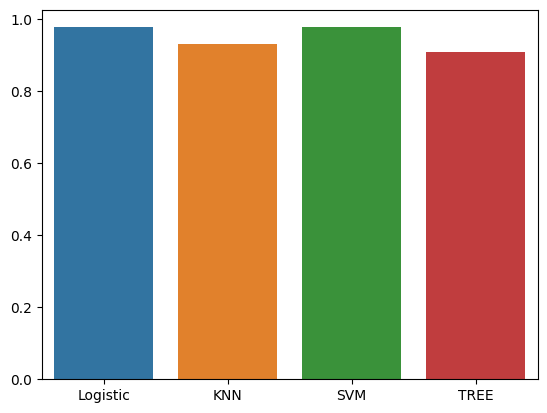

In [26]:
sns.barplot(x=models_names, y=models_scores, data=df)